In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# import data and see what it looks like
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Data Dictionary

| Column | Description |
| ----------- | ----------- |
| PassengerId | Unique ID for each passenger |
| HomePlanet | Planet passenger departed from, typically home planet |
| CryoSleep | Whether passenger elected to be put into suspended animation for the duration of the voyage |
| Cabin | Cabin Number |
| Destination | Destination Planet |
| Age | Age |
| VIP | Whether passenger paid for special VIP service |
| RoomService | Amount passenger has billed for room service |
| FoodCourt | Amount passenger has billed at the food court |
| ShoppingMall | Amount passenger has billed at the shopping mall |
| Spa | Amount passenger has billed at the spa |
| VRDeck | Amount passenger has billed at the VR deck |
| Name | Name |
| Transported | Whether passenger was transported to another dimension |

In [6]:
# check how many rows and columns
df.shape

(8693, 14)

In [9]:
# check additional info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Hmm, I wonder if some of the fields with missing values, such as name & destination (unusual), are because of crew members.

In [5]:
# check statistics for numerical columns
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [36]:
# check value counts for the different columns
for col in df.select_dtypes(exclude = ['float64']).columns:
    print(col)
    print(df[col].value_counts())
    print('')

PassengerId
6135_01    1
1248_01    1
5060_03    1
8503_03    1
8287_01    1
          ..
2019_01    1
3732_03    1
3382_01    1
3147_01    1
1316_02    1
Name: PassengerId, Length: 8693, dtype: int64

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

CryoSleep
False    5439
True     3037
Name: CryoSleep, dtype: int64

Cabin
G/734/S     8
B/82/S      7
C/137/S     7
G/1368/P    7
D/176/S     7
           ..
G/1398/P    1
B/85/P      1
F/1413/S    1
F/372/S     1
F/372/P     1
Name: Cabin, Length: 6560, dtype: int64

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

VIP
False    8291
True      199
Name: VIP, dtype: int64

Name
Apix Wala            2
Asch Stradick        2
Gollux Reedall       2
Keitha Josey         2
Gwendy Sykess        2
                    ..
Iney Lambucketty     1
Daisya Evedorsen     1
Katiey Gallencis     1
Elody Hubbarrison    1
Lynnee Wooterston    1
Name: Name, Le

In [38]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


(array([ 591.,  649., 2089., 1976., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

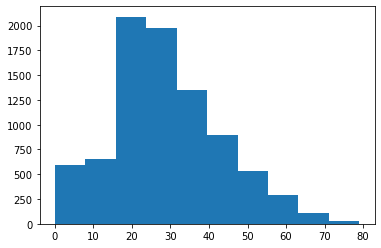

In [41]:
# check age distribution
plt.hist(df.Age)